<a href="https://colab.research.google.com/github/Pepi134/VNP/blob/main/%D0%92%D0%9D%D0%9F_%D1%81%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D0%B4%D0%B5%D0%BD_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%A2%D0%B5%D0%BC%D0%B010_%D0%9F%D0%B5%D1%82%D1%80%D0%B8%D0%BD%D0%B0_%D0%A1%D1%82%D0%B0%D0%BD%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B0_201073_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Да се соберат податоци за цените на еден ист продукт од продавница налик ananas и да се направи агрегација на продукти кои се исти со цел споредба на цена

# **Phone Price Comparison and Aggregation from Setec and Tehnomarket**

## Scraping and Parsing Mobile Phone Data from Setec

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL за мобилни телефони на Setec
base_url = "https://setec.mk/phones--navigation/mobile-phones?page="

# Хедери за HTTP барање
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

# Функција за парсирање на една страница
def parse_page(page_number):
    url = base_url + str(page_number)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        products = soup.find_all('div', class_='product clearfix product-hover')

        if not products:
            print(f"Нема пронајдено продукти на страница {page_number}.")
        else:
            for product in products:
                # Извлекување на името на телефон
                phone_name = product.find('div', class_='name')
                phone_name = phone_name.text.strip() if phone_name else 'Нема име'

                # Извлекување на шифрата на телефон
                phone_code = product.find('div', class_='shifra')
                phone_code = phone_code.text.strip() if phone_code else 'Нема шифра'

                # Извлекување на редовната цена на телефон
                regular_price = product.find('span', class_='price-old-new')
                regular_price = regular_price.text.strip() if regular_price else 'Нема редовна цена'

                # Извлекување на акциската цена на телефон
                discount_price = product.find('span', class_='price-new-new')
                discount_price = discount_price.text.strip() if discount_price else 'Нема акциска цена'

                # Печатење на информациите за телефоните
                print(f"Име на телефон: {phone_name}")
                print(f"Шифра на телефон: {phone_code}")
                print(f"Редовна цена: {regular_price}")
                print(f"Акциска цена: {discount_price}")
                print('---')
                data_setec = []
                data_setec.append({
                    'Име': phone_name,
                    'Шифра': phone_code,
                    'Редовна цена': regular_price,
                    'Акциска цена': discount_price
                })

    else:
        print(f"Не успеав да ја преземам страницата {page_number}.")

# Итерација преку сите страници (1 до 10)
for page in range(1, 10):
    parse_page(page)


Име на телефон: AGM M2 QMOBILE L2
Шифра на телефон: Шифра: 48821
Редовна цена: 1,299 Ден.
Акциска цена: 999 Ден.
---
Име на телефон: UNIWA E1802 Dual Sim Feature phone Black
Шифра на телефон: Шифра: 78359
Редовна цена: 1,199 Ден.
Акциска цена: 1,199 Ден.
---
Име на телефон: UNIWA E1802 Dual Sim Feature phone Blue
Шифра на телефон: Шифра: 78360
Редовна цена: 1,199 Ден.
Акциска цена: 1,199 Ден.
---
Име на телефон: TCL Onetouch 4021 Black
Шифра на телефон: Шифра: 78160
Редовна цена: 1,499 Ден.
Акциска цена: 1,299 Ден.
---
Име на телефон: Nokia 105 Black
Шифра на телефон: Шифра: 77399
Редовна цена: 1,999 Ден.
Акциска цена: 1,599 Ден.
---
Име на телефон: Nokia 105 Green
Шифра на телефон: Шифра: 78273
Редовна цена: 1,999 Ден.
Акциска цена: 1,599 Ден.
---
Име на телефон: AllCall Brother 4G 3 / 32
Шифра на телефон: Шифра: 52379
Редовна цена: 5,499 Ден.
Акциска цена: 3,995 Ден.
---
Име на телефон: AllCall Smooth 4G 3 / 32
Шифра на телефон: Шифра: 53519
Редовна цена: 5,499 Ден.
Акциска цена: 3,9

## Scraping and Parsing Mobile Phone Data from Tehnomarket

In [ ]:
import requests
from bs4 import BeautifulSoup

# Функција за добивање податоци
def get_phone_data(page_number):
    url = f'https://tehnomarket.com.mk/category/4109/mobilni-telefoni#page/{page_number}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    products = soup.find_all('li', class_='span4 product-fix')

    phone_data = []

    for product in products:
        name = product.find('div', class_='product-name').get_text(strip=True)
        price = product.find('span', class_='nm').get_text(strip=True)
        product_url = product.find('a')['href']

        phone_data.append({
            'name': name,
            'price': price,
            'url': product_url
        })

    return phone_data

# Главна функција за собирање на податоците од сите страници
def scrape_all_pages(total_pages):
    all_phone_data = []

    for page_number in range(1, total_pages + 1):
        page_data = get_phone_data(page_number)
        all_phone_data.extend(page_data)

    return all_phone_data

# Собирање на податоците од сите 10 страници
total_pages = 10
phone_data = scrape_all_pages(total_pages)

# Испечати ги податоците на екран
for data in phone_data:
    print(f"Name: {data['name']}")
    print(f"Price: {data['price']}")
    print(f"URL: {data['url']}")
    print('---')


Name: Mobile Phone Denver B185 Black
Price: 1,199
URL: https://tehnomarket.com.mk/product/29399411/mobile-phone-denver-b185-black
---
Name: NOKIA 105 2017 DUAL SIM BLACK
Price: 1,399
URL: https://tehnomarket.com.mk/product/29291182/nokia-105-2017-dual-sim-black
---
Name: MEANIT VETERAN I MOBILE PHONE BLACK
Price: 1,399
URL: https://tehnomarket.com.mk/product/29390818/meanit-veteran-i-mobile-phone-black
---
Name: MEANIT F26 MOBILE PHONE RED
Price: 1,399
URL: https://tehnomarket.com.mk/product/29395158/meanit-f26-mobile-phone-red
---
Name: MEANIT VETERAN I MOBILE PHONE WHITE
Price: 1,399
URL: https://tehnomarket.com.mk/product/29398228/meanit-veteran-i-mobile-phone-white
---
Name: Mobile Phone Denver F1806 Black
Price: 1,399
URL: https://tehnomarket.com.mk/product/29399410/mobile-phone-denver-f1806-black
---
Name: MEANIT VETERAN IV PLUS MOBILE PHONE BLACK + GRATIS FUTROLA
Price: 1,499
URL: https://tehnomarket.com.mk/product/29389481/meanit-veteran-iv-plus-mobile-phone-black-gratis-futrol

## Creating and Saving DataFrame from Scraped Data-Setec

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Базен URL за мобилни телефони на Setec
base_url = "https://setec.mk/phones--navigation/mobile-phones?page="

# Хедери за HTTP барање
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

# Иницијализација на празен список за чување на податоците
data = []

# Функција за парсирање на една страница
def parse_page(page_number):
    url = base_url + str(page_number)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        products = soup.find_all('div', class_='product clearfix product-hover')

        if not products:
            print(f"Нема пронајдено продукти на страница {page_number}.")
        else:
            for product in products:
                # Извлекување на името на телефон
                phone_name = product.find('div', class_='name')
                phone_name = phone_name.text.strip() if phone_name else 'Нема име'

                # Извлекување на шифрата на телефон
                phone_code = product.find('div', class_='shifra')
                phone_code = phone_code.text.strip() if phone_code else 'Нема шифра'

                # Извлекување на редовната цена на телефон
                regular_price = product.find('span', class_='price-old-new')
                regular_price = regular_price.text.strip() if regular_price else 'Нема редовна цена'

                # Извлекување на акциската цена на телефон
                discount_price = product.find('span', class_='price-new-new')
                discount_price = discount_price.text.strip() if discount_price else 'Нема акциска цена'

                # Додавање на информациите во списокот 'data'
                data.append({
                    'Име': phone_name,
                    'Шифра': phone_code,
                    'Редовна цена во Сетек': regular_price,
                    'Акциска цена': discount_price
                })

    else:
        print(f"Не успеав да ја преземам страницата {page_number}.")

# Итерација преку сите страници (1 до 11)
for page in range(1, 10):  # 12 не е вклучено, се оди до 11
    parse_page(page)

# Креирање на DataFrame од собраните податоци
df_setec = pd.DataFrame(data)



# Запишување на DataFrame во CSV фајл
df_setec.to_csv('setec_phones.csv', index=False)
df_setec


,Име,Шифра,Редовна цена во Сетек,Акциска цена
0,AGM M2 QMOBILE L2,Шифра: 48821,"1,299 Ден.",999 Ден.
1,UNIWA E1802 Dual Sim Feature phone Black,Шифра: 78359,"1,199 Ден.","1,199 Ден."
2,UNIWA E1802 Dual Sim Feature phone Blue,Шифра: 78360,"1,199 Ден.","1,199 Ден."
3,TCL Onetouch 4021 Black,Шифра: 78160,"1,499 Ден.","1,299 Ден."
4,Nokia 105 Black,Шифра: 77399,"1,999 Ден.","1,599 Ден."
...,...,...,...,...
264,Samsung Galaxy Fold 6 12GB / 256GB Pink,Шифра: 78235,"119,999 Ден.","117,999 Ден."
265,Samsung Galaxy Fold 6 12GB / 256GB Silver Shadow,Шифра: 78236,"119,999 Ден.","117,999 Ден."
266,Apple iPhone 15 Pro Max 1TB Black Titanium,Шифра: 56794,"142,990 Ден.","124,990 Ден."
267,Apple iPhone 15 Pro Max 1TB Natural Titanium,Шифра: 56795,"142,990 Ден.","124,990 Ден."


## Data Preparation-Setec

In [ ]:
# Отстрани го зборот 'Ден.' од колоните за редовна и акциска цена


df_setec['Редовна цена во Сетек'] = df_setec['Редовна цена во Сетек'].str.replace('Ден.', '', regex=False).str.replace('.', '', regex=False)

df_setec

,Име,Шифра,Редовна цена во Сетек,Акциска цена
0,AGM M2 QMOBILE L2,Шифра: 48821,"1,299",999 Ден.
1,UNIWA E1802 Dual Sim Feature phone Black,Шифра: 78359,"1,199","1,199 Ден."
2,UNIWA E1802 Dual Sim Feature phone Blue,Шифра: 78360,"1,199","1,199 Ден."
3,TCL Onetouch 4021 Black,Шифра: 78160,"1,499","1,299 Ден."
4,Nokia 105 Black,Шифра: 77399,"1,999","1,599 Ден."
...,...,...,...,...
264,Samsung Galaxy Fold 6 12GB / 256GB Pink,Шифра: 78235,"119,999","117,999 Ден."
265,Samsung Galaxy Fold 6 12GB / 256GB Silver Shadow,Шифра: 78236,"119,999","117,999 Ден."
266,Apple iPhone 15 Pro Max 1TB Black Titanium,Шифра: 56794,"142,990","124,990 Ден."
267,Apple iPhone 15 Pro Max 1TB Natural Titanium,Шифра: 56795,"142,990","124,990 Ден."


## Creating and Saving DataFrame from Scraped Data-Tehnomarket

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Функција за добивање податоци од една страница
def get_phone_data(page_number):
    url = f'https://tehnomarket.com.mk/category/4109/mobilni-telefoni#page/{page_number}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    products = soup.find_all('li', class_='span4 product-fix')

    phone_data = []

    for product in products:
        name = product.find('div', class_='product-name').get_text(strip=True)
        price = product.find('span', class_='nm').get_text(strip=True)
        product_url = product.find('a')['href']

        phone_data.append({
            'Име': name,
            'Редовна цена во Техномаркет': price,
            'url': product_url
        })

    return phone_data

# Главна функција за собирање на податоците од сите страници
def scrape_all_pages(total_pages):
    all_phone_data = []

    for page_number in range(1, total_pages + 1):
        page_data = get_phone_data(page_number)
        all_phone_data.extend(page_data)

    return all_phone_data

# Собирање на податоците од сите 10 страници
total_pages = 10
phone_data = scrape_all_pages(total_pages)

# Создавање на DataFrame од податоците
df_tehnomarket = pd.DataFrame(phone_data)

# Зачувување на податоците во CSV датотека
df_tehnomarket.to_csv('tehnomarket_data.csv', index=False)

print("Податоците се успешно зачувани во 'tehnomarket_data.csv'.")
df_tehnomarket

Податоците се успешно зачувани во 'tehnomarket_data.csv'.


,Име,Редовна цена во Техномаркет,url
0,Mobile Phone Denver B185 Black,"1,199",https://tehnomarket.com.mk/product/29399411/mo...
1,NOKIA 105 2017 DUAL SIM BLACK,"1,399",https://tehnomarket.com.mk/product/29291182/no...
2,MEANIT VETERAN I MOBILE PHONE BLACK,"1,399",https://tehnomarket.com.mk/product/29390818/me...
3,MEANIT F26 MOBILE PHONE RED,"1,399",https://tehnomarket.com.mk/product/29395158/me...
4,MEANIT VETERAN I MOBILE PHONE WHITE,"1,399",https://tehnomarket.com.mk/product/29398228/me...
...,...,...,...
215,Apple iPhone 15 Pro Max Silicone Case w MagSaf...,"4,899",https://tehnomarket.com.mk/product/29398162/ap...
216,"BLACKVIEW OSCAL C20 6.088"" HD+ BLACK QUAD CORE...","5,299",https://tehnomarket.com.mk/product/29390741/bl...
217,BLACKVIEW A50 BLACK HD+ 20:9 QUAD 2.0GHZ/3GB/6...,"5,699",https://tehnomarket.com.mk/product/29396349/bl...
218,"DOOGEE X93 6.1"" HD 18:9 SMARTPHONE QUAD CORE 1...","5,999",https://tehnomarket.com.mk/product/29389685/do...


## Data Preparation-Tehnomarket

In [ ]:
# Бришење на колоната со URL
df_tehnomarket.drop(columns=['url'], inplace=True)

# Прикажување на DataFrame по бришењето на колоната
df_tehnomarket


,Име,Редовна цена во Техномаркет
0,Mobile Phone Denver B185 Black,"1,199"
1,NOKIA 105 2017 DUAL SIM BLACK,"1,399"
2,MEANIT VETERAN I MOBILE PHONE BLACK,"1,399"
3,MEANIT F26 MOBILE PHONE RED,"1,399"
4,MEANIT VETERAN I MOBILE PHONE WHITE,"1,399"
...,...,...
215,Apple iPhone 15 Pro Max Silicone Case w MagSaf...,"4,899"
216,"BLACKVIEW OSCAL C20 6.088"" HD+ BLACK QUAD CORE...","5,299"
217,BLACKVIEW A50 BLACK HD+ 20:9 QUAD 2.0GHZ/3GB/6...,"5,699"
218,"DOOGEE X93 6.1"" HD 18:9 SMARTPHONE QUAD CORE 1...","5,999"


## Data Preparation- Fuzzy Matching and DataFrame Creation for Phone Prices

In [ ]:
!pip install fuzzywuzzy
!pip install rapidfuzz

import re
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# List of phone names from Setec
setec_phones = df_setec['Име'].astype(str).tolist()

# List of phone names from Tehnomarket
tehnomarket_phones = df_tehnomarket['Име'].astype(str).tolist()

# Find matches and create a new DataFrame
matches = []
for phone in setec_phones:
    # More aggressive cleaning (remove numbers and specific keywords)
    cleaned_phone = re.sub(r'[^a-zA-Z ]', '', phone).lower().strip()
    cleaned_phone = re.sub(r'\b(black|silver|ultra|max|pro|lite|samsung|iphone|xiaomi|apple)\b', '', cleaned_phone).strip()

    # Find potential matches
    potential_matches = process.extract(cleaned_phone, tehnomarket_phones, scorer=fuzz.token_set_ratio, limit=3)

    for match in potential_matches:
        if match[1] >= 90:  # Higher threshold for top matches
            setec_price = df_setec.loc[df_setec['Име'] == phone, 'Редовна цена во Сетек'].values
            tehnomarket_price = df_tehnomarket.loc[df_tehnomarket['Име'] == match[0], 'Редовна цена во Техномаркет'].values
            matches.append({
                'Име': phone,
                'Редовна цена во Сетек': setec_price[0] if len(setec_price) > 0 else None,
                'Редовна цена во Техномаркет': tehnomarket_price[0] if len(tehnomarket_price) > 0 else None
            })
            break  # Move to the next phone once a match is found

df_matches = pd.DataFrame(matches)

# Remove rows with NaN or None values
df_matches = df_matches.dropna()

# Remove duplicates based on 'Име'
df_matches = df_matches.drop_duplicates(subset=['Име'])
df_matches


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,Име,Редовна цена во Сетек,Редовна цена во Техномаркет
0,Nokia 105 Black,"1,999","1,399"
1,Blackview A52 2 / 32 Black,"5,999","5,299"
2,Blackview A80 Black,"6,499","5,299"
3,Blackview A60 Pro 3 / 16 Black,"6,499","5,299"
4,Blackview A70 3 / 32 Black,"7,299","5,299"
5,Blackview A55 PRO 4 / 64 Black,"7,499","5,299"
6,Blackview A70 Pro 4 / 32 Black,"7,399","5,299"


##  Data Preparation-Convert Price Strings to Floats in DataFrame

In [ ]:
import pandas as pd


# Define the conversion function
def convert_price(price_str):
    if isinstance(price_str, str): # Check if the value is a string
        try:
            # Remove commas and convert to float
            return float(price_str.replace(',', ''))
        except ValueError:
            return None
    else:
        return price_str # Return the value as is if it's not a string


# Apply the conversion function to both price columns
df_matches['Редовна цена во Сетек'] = df_matches['Редовна цена во Сетек'].apply(convert_price)
df_matches['Редовна цена во Техномаркет'] = df_matches['Редовна цена во Техномаркет'].apply(convert_price)

# Display the updated DataFrame
print(df_matches)

df_matches

                               Име  Редовна цена во Сетек  \
0                  Nokia 105 Black                 1999.0   
1      Blackview A52 2 / 32  Black                 5999.0   
2             Blackview A80  Black                 6499.0   
3   Blackview A60 Pro 3 / 16 Black                 6499.0   
4       Blackview A70 3 / 32 Black                 7299.0   
5  Blackview A55 PRO 4 / 64  Black                 7499.0   
6   Blackview A70 Pro 4 / 32 Black                 7399.0   

   Редовна цена во Техномаркет  
0                       1399.0  
1                       5299.0  
2                       5299.0  
3                       5299.0  
4                       5299.0  
5                       5299.0  
6                       5299.0  


,Име,Редовна цена во Сетек,Редовна цена во Техномаркет
0,Nokia 105 Black,1999.0,1399.0
1,Blackview A52 2 / 32 Black,5999.0,5299.0
2,Blackview A80 Black,6499.0,5299.0
3,Blackview A60 Pro 3 / 16 Black,6499.0,5299.0
4,Blackview A70 3 / 32 Black,7299.0,5299.0
5,Blackview A55 PRO 4 / 64 Black,7499.0,5299.0
6,Blackview A70 Pro 4 / 32 Black,7399.0,5299.0


## Aggregation and Comparison of Phone Prices

### Scatter Plot of Setec vs. Tehnomarket Phone Prices
-The relationship between phone prices from Setec and Tehnomarket, showing how prices from one source compare to the other

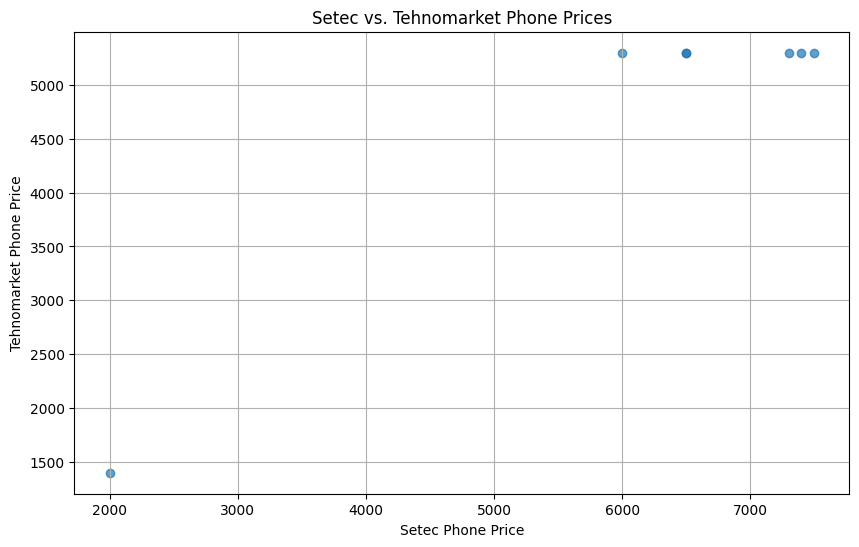

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_matches['Редовна цена во Сетек'], df_matches['Редовна цена во Техномаркет'], alpha=0.7)
plt.title('Setec vs. Tehnomarket Phone Prices')
plt.xlabel('Setec Phone Price')
plt.ylabel('Tehnomarket Phone Price')
plt.grid(True)
plt.show()

### Histogram of Price Differences Between Setec and Tehnomarket
-The distribution of price differences between Setec and Tehnomarket, showing how frequently different price discrepancies occur

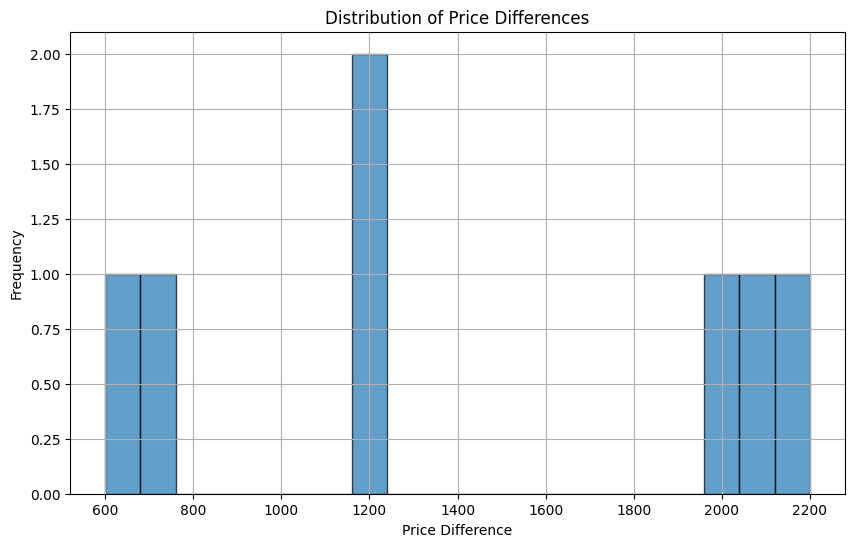

In [ ]:
df_matches['Разлика во цените'] = df_matches['Редовна цена во Сетек'] - df_matches['Редовна цена во Техномаркет']

plt.figure(figsize=(10, 6))
plt.hist(df_matches['Разлика во цените'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price Differences')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Box Plot of Laptop Prices from Setec and Tehnomarket
-Compare the distribution of laptop prices between Setec and Tehnomarket, highlighting the range and central tendency of prices from each source.

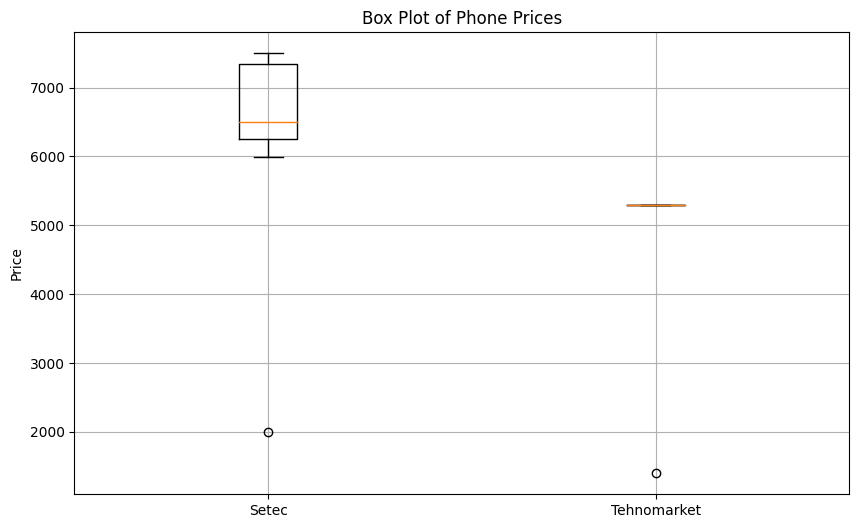

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_matches['Редовна цена во Сетек'].dropna(), df_matches['Редовна цена во Техномаркет'].dropna()],
            labels=['Setec', 'Tehnomarket'])
plt.title('Box Plot of Phone Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Interactive Bubble Chart of Phone Prices and Differences
-Visualize the relationship between phone prices from Setec and Tehnomarket, with bubble sizes representing the magnitude of price differences and colors indicating the direction of the difference.

In [ ]:
import plotly.express as px

# Create an interactive bubble chart
fig = px.scatter(df_matches,
                 x='Редовна цена во Сетек',
                 y='Редовна цена во Техномаркет',
                 size=df_matches['Разлика во цените'].abs(),  # Use the absolute value of price difference for size
                 color='Разлика во цените',  # Use the correct column name for color
                 hover_name='Име',
                 title='Interactive Bubble Chart of Phone Prices and Differences')

fig.update_layout(xaxis_title='Setec Phone Price',
                  yaxis_title='Tehnomarket Phone Price')

fig.show()


### Heatmap of Average Price Differences Between Setec and Tehnomarket
-Visualize the average price differences between Setec and Tehnomarket, with color intensity indicating the magnitude of the differences.

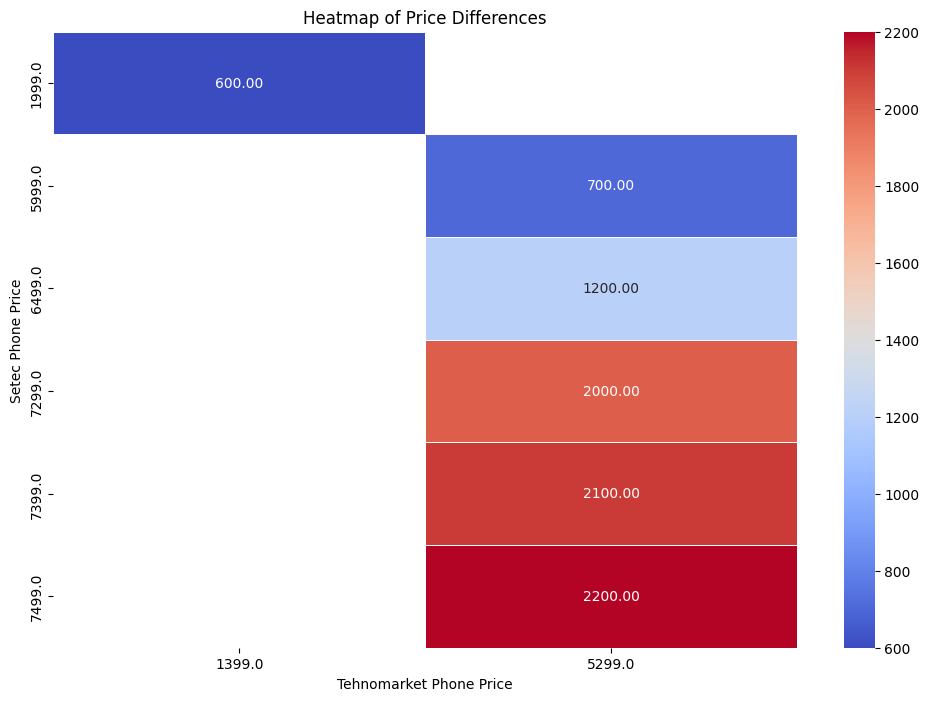

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = df_matches.pivot_table(index='Редовна цена во Сетек',
                                      columns='Редовна цена во Техномаркет',
                                      values='Разлика во цените',
                                      aggfunc='mean')  # or use another aggregation function like 'sum'

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Price Differences')
plt.xlabel('Tehnomarket Phone Price')
plt.ylabel('Setec Phone Price')
plt.show()


### Summary Statistics of Phone Prices from Setec and Tehnomarket
-Compute and display summary statistics (e.g., mean, median, standard deviation) for phone prices from Setec and Tehnomarket, providing an overview of the price distributions.

In [ ]:
# Aggregating prices to get summary statistics
summary_stats = df_matches[['Редовна цена во Сетек', 'Редовна цена во Техномаркет']].describe()
summary_stats

,Редовна цена во Сетек,Редовна цена во Техномаркет
count,7.000000,7.000000
mean,6170.428571,4741.857143
std,1923.290831,1474.061445
min,1999.000000,1399.000000
25%,6249.000000,5299.000000
50%,6499.000000,5299.000000
75%,7349.000000,5299.000000
max,7499.000000,5299.000000


### Dash App for Interactive Phone Price Comparison
-Develop a Dash web application that presents an interactive scatter plot comparing phone prices from Setec and Tehnomarket. The plot uses bubble size and color to represent the magnitude and direction of price differences.

In [ ]:
!pip install dash

import dash
from dash import dcc, html
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='price-comparison',
        figure=px.scatter(df_matches,
                         x='Редовна цена во Сетек',
                         y='Редовна цена во Техномаркет',
                         size=df_matches['Разлика во цените'].abs(),  # Use the absolute value of price difference for size
                         color='Разлика во цените',
                         hover_name='Име',  # Use the correct column name
                         title='Price Comparison of Phones')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.4 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

### Pair Plot of Phone Prices and Price Differences
-Visualize relationships and distributions between phone prices from Setec and Tehnomarket, along with their price differences. The pair plot provides insights into how these variables correlate with each other.

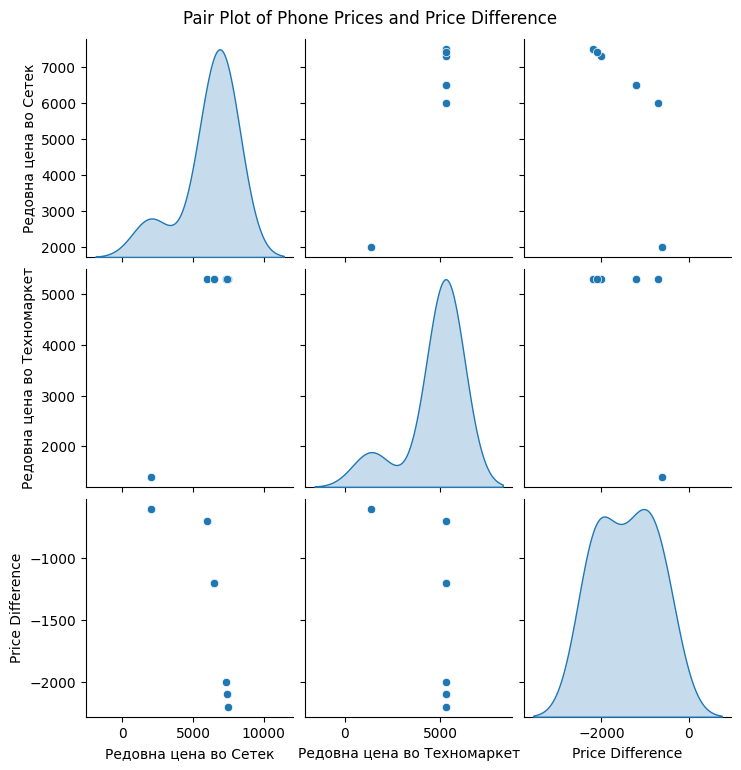

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_matches has the columns 'Име', 'Редовна цена во Сетек', and 'Редовна цена во Техномаркет'
df_extended = df_matches.copy()

# Calculate the price difference between Tehnomarket and Setec
df_extended['Price Difference'] = df_extended['Редовна цена во Техномаркет'] - df_extended['Редовна цена во Сетек']

# Plot pairplot
sns.pairplot(df_extended[['Редовна цена во Сетек', 'Редовна цена во Техномаркет', 'Price Difference']], diag_kind='kde')
plt.suptitle('Pair Plot of Phone Prices and Price Difference', y=1.02)
plt.show()


### Descriptive Statistics of Phone Prices with Variance, Skewness, and Kurtosis
-Compute comprehensive descriptive statistics for phone prices from Setec and Tehnomarket, including mean, variance, skewness, and kurtosis. These metrics provide insights into the distribution, variability, and shape of the price data.

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate descriptive statistics for phone prices
desc_stats = df_matches[['Редовна цена во Сетек', 'Редовна цена во Техномаркет']].describe().transpose()

# Calculate additional statistics: variance, skewness, and kurtosis
desc_stats['variance'] = df_matches[['Редовна цена во Сетек', 'Редовна цена во Техномаркет']].var()
desc_stats['skewness'] = df_matches[['Редовна цена во Сетек', 'Редовна цена во Техномаркет']].apply(lambda x: skew(x.dropna()))
desc_stats['kurtosis'] = df_matches[['Редовна цена во Сетек', 'Редовна цена во Техномаркет']].apply(lambda x: kurtosis(x.dropna()))

# Print the descriptive statistics
print(desc_stats)
desc_stats


                             count         mean          std     min     25%  \
Редовна цена во Сетек          7.0  6170.428571  1923.290831  1999.0  6249.0   
Редовна цена во Техномаркет    7.0  4741.857143  1474.061445  1399.0  5299.0   

                                50%     75%     max      variance  skewness  \
Редовна цена во Сетек        6499.0  7349.0  7499.0  3.699048e+06 -1.692412   
Редовна цена во Техномаркет  5299.0  5299.0  5299.0  2.172857e+06 -2.041241   

                             kurtosis  
Редовна цена во Сетек        1.402884  
Редовна цена во Техномаркет  2.166667  


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
Редовна цена во Сетек,7.0,6170.428571,1923.290831,1999.0,6249.0,6499.0,7349.0,7499.0,3.699048e+06,-1.692412,1.402884
Редовна цена во Техномаркет,7.0,4741.857143,1474.061445,1399.0,5299.0,5299.0,5299.0,5299.0,2.172857e+06,-2.041241,2.166667


### Linear Regression Model for Predicting Tehnomarket Prices Using Setec Prices

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data: using phone prices from Setec as the feature and prices from Tehnomarket as the target
X = df_matches[['Редовна цена во Сетек']].dropna()
y = df_matches['Редовна цена во Техномаркет'].dropna()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error of the Model: {mse:.2f}")


Mean Squared Error of the Model: 115025.47
